<a href="https://colab.research.google.com/github/shimonShouei/music_popularity_predict/blob/master/Music_Popularity_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project in Data Bases - Prediction of music popularity**


### Download data from kagle

In [ ]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"shouei","key":"70628051b76f2e0a539b9a2378202f6a"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library
!kaggle datasets list -s prediction-of-music-genre
!kaggle datasets download -d vicsuperman/prediction-of-music-genre -p /content/kaggle/
import zipfile
with zipfile.ZipFile("/content/kaggle/prediction-of-music-genre.zip", 'r') as zip_ref:
      zip_ref.extractall("/content/kaggle/")

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
vicsuperman/prediction-of-music-genre                    Prediction of music genre                            3MB  2021-11-02 12:47:20           2152  
andradaolteanu/gtzan-dataset-music-genre-classification  GTZAN Dataset - Music Genre Classification           1GB  2020-03-24 14:05:33          17105  
purumalgi/music-genre-classification                     Music Genre Classification                           1MB  2021-08-07 07:11:37           2055  
harish24/music-genre-classification                      Music Genre Classification                         229KB  2020-11-03 08:02:13            681  
grasslover/spotify-music-genre-list                      Spotify music genre list and 80

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 8.1 MB/s 


### Improts

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from matplotlib import pyplot as plt
from sklearn import metrics
import shap
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import re
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from wordcloud import WordCloud 

### Data load

In [ ]:
df = pd.read_csv("/content/kaggle/music_genre.csv")

# **Data Understanding**
In this part, after we chose our dataset, we need to explore it. To understand how it look like, how many samples does it have, what are the labels, etc.

In [ ]:
# read data
print("Data shape is:", df.shape)
print()
print("Displays the data:")
display(df)
print()
print("Describe the features:")
display(df.describe().transpose())



Data shape is: (50005, 18)

Displays the data:


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop



Describe the features:


,count,mean,std,min,25%,50%,75%,max
instance_id,50000.0,55888.396360,20725.256253,20002.000000,37973.5000,55913.500000,73863.250000,91759.000
popularity,50000.0,44.220420,15.542008,0.000000,34.0000,45.000000,56.000000,99.000
acousticness,50000.0,0.306383,0.341340,0.000000,0.0200,0.144000,0.552000,0.996
danceability,50000.0,0.558241,0.178632,0.059600,0.4420,0.568000,0.687000,0.986
duration_ms,50000.0,221252.602860,128671.957157,-1.000000,174800.0000,219281.000000,268612.250000,4830606.000
energy,50000.0,0.599755,0.264559,0.000792,0.4330,0.643000,0.815000,0.999
instrumentalness,50000.0,0.181601,0.325409,0.000000,0.0000,0.000158,0.155000,0.996
liveness,50000.0,0.193896,0.161637,0.009670,0.0969,0.126000,0.244000,1.000
loudness,50000.0,-9.133761,6.162990,-47.046000,-10.8600,-7.276500,-5.173000,3.744
speechiness,50000.0,0.093586,0.101373,0.022300,0.0361,0.048900,0.098525,0.942


In [ ]:
print("columns names of dataset:" ,df.columns)

columns names of dataset: Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')


In [ ]:
print("sample of the data:", df.head())

sample of the data:    instance_id           artist_name  ... valence  music_genre
0      32894.0              Röyksopp  ...   0.759   Electronic
1      46652.0  Thievery Corporation  ...   0.531   Electronic
2      30097.0        Dillon Francis  ...   0.333   Electronic
3      62177.0              Dubloadz  ...   0.270   Electronic
4      24907.0           What So Not  ...   0.323   Electronic

[5 rows x 18 columns]


count    50000.000000
mean        44.220420
std         15.542008
min          0.000000
25%         34.000000
50%         45.000000
75%         56.000000
max         99.000000
Name: popularity, dtype: float64


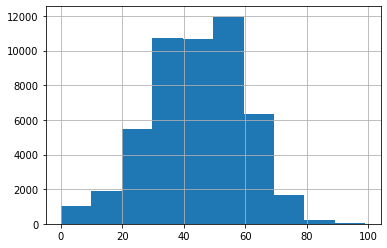

In [ ]:
# print("number of samples:", df.groupby('popularity')['popularity'].count())
print(df["popularity"].describe())
df["popularity"].hist()


In [ ]:
print("unique labels of:")
print("artist_name:",df['artist_name'].unique())
print("track_name:",df['track_name'].unique())
print("duration_ms:",df['duration_ms'].unique())
print("tempo:",df['tempo'].unique())
print("mode:",df['mode'].unique())
print("key:",df['key'].unique())
print("obtained_date:",df['obtained_date'].unique())
print("music_genre:",df['music_genre'].unique())

unique labels of:
artist_name: ['Röyksopp' 'Thievery Corporation' 'Dillon Francis' ... 'Darshan Raval'
 'Powers Pleasant' 'Millonario']
track_name: ["Röyksopp's Night Out" 'The Shining Path' 'Hurricane' ...
 'Drama (feat. Drake)' "Lovin' Me (feat. Smiggz)" 'Hip Hop Hooray']
duration_ms: [-1.00000e+00  2.18293e+05  2.15613e+05 ...  1.97923e+05  2.51860e+05
  1.89483e+05]
tempo: ['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']
mode: ['Minor' 'Major' nan]
key: ['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
obtained_date: ['4-Apr' '3-Apr' '5-Apr' '1-Apr' nan '0/4']
music_genre: ['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock' 'Classical' 'Hip-Hop']


In [ ]:
# print("Check if there are null values:")
# display(df.isna().sum())
# print("Show the null values in data:")
# print(df[df.isnull().any(axis=1)])

In [ ]:
print("Check type values:")
df.dtypes

Check type values:


instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

## Features Distribution

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

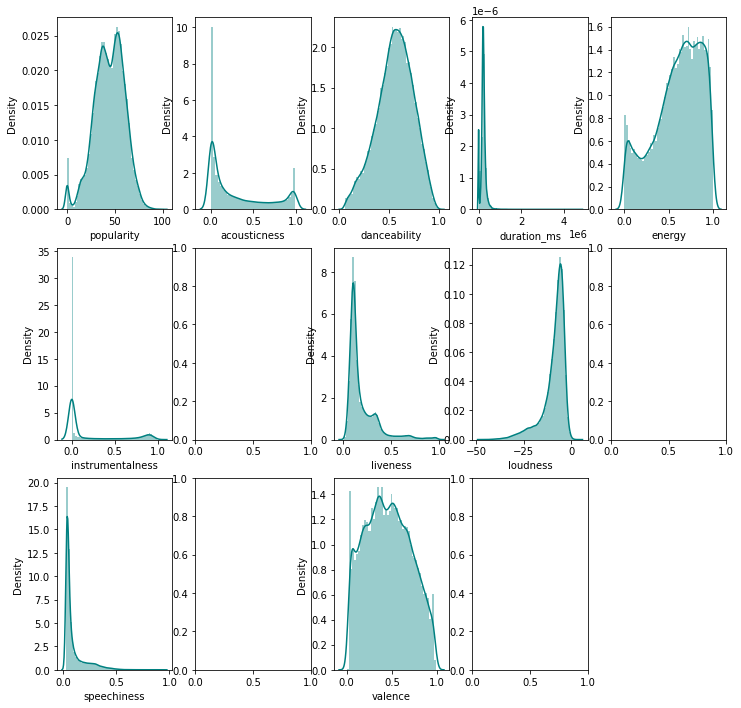

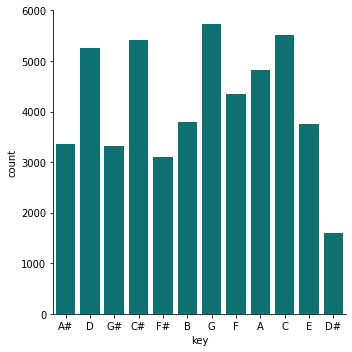

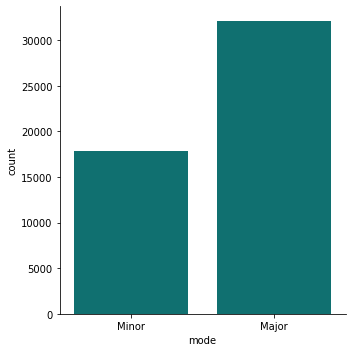

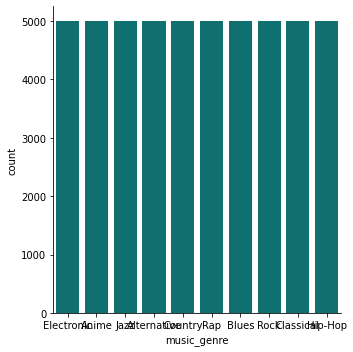

In [ ]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( df["popularity"] , color="teal", ax=axes[0, 0])
sns.distplot( df["acousticness"] , color="teal", ax=axes[0, 1])
sns.distplot( df["danceability"] , color="teal", ax=axes[0, 2])
sns.distplot( df["duration_ms"] , color="teal", ax=axes[0, 3])
sns.distplot( df["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( df["instrumentalness"] , color="teal", ax=axes[1, 0])
sns.catplot( data=df , color="teal", ax=axes[1, 1], kind="count", x="key")
sns.distplot( df["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( df["loudness"] , color="teal", ax=axes[1, 3])
sns.catplot( data=df , color="teal", ax=axes[1, 4], kind="count", x="mode")
sns.distplot( df["speechiness"] , color="teal", ax=axes[2, 0])
# sns.catplot( data=df , color="teal", ax=axes[2, 1], y="count", x="tempo")
sns.distplot( df["valence"] , color="teal", ax=axes[2, 2])
sns.catplot( data=df , color="teal", ax=axes[2, 3], kind="count", x="music_genre")


f.delaxes(axes[2][4])
plt.show()

# **Data Preparation**

## Cleaning Data

In [ ]:
# The data contains 5 empty record that we will remove immediately
print(df[df.isnull().any(axis=1)])
df.dropna(inplace=True)

       instance_id artist_name track_name  ...  obtained_date  valence  music_genre
10000          NaN         NaN        NaN  ...            NaN      NaN          NaN
10001          NaN         NaN        NaN  ...            NaN      NaN          NaN
10002          NaN         NaN        NaN  ...            NaN      NaN          NaN
10003          NaN         NaN        NaN  ...            NaN      NaN          NaN
10004          NaN         NaN        NaN  ...            NaN      NaN          NaN

[5 rows x 18 columns]


The data contains one song singer which make problem in fueture extraction. Thus we decided that our model wont deal with such songs.
We removed them.

In [ ]:
grouped_by_artist = df.groupby("artist_name").agg('count')["key"]
display(grouped_by_artist)
df.drop(df[df["artist_name"].isin(grouped_by_artist[grouped_by_artist==1].index)].index, inplace=True)

artist_name
!!!                    22
"Weird Al" Yankovic     1
$NOT                    3
$tupid Young            1
$uicideBoy$            92
                       ..
棗坂シキ(CV.平川大輔)           1
楚神ウリエ(CV.近藤隆)           2
立華リツカ(CV.茜屋日海夏)         1
鉤貫レム(CV.斉藤壮馬)           1
黒崎真音                   10
Name: key, Length: 6863, dtype: int64

In [ ]:
print("Data shape is:", df.shape)

Data shape is: (47654, 18)


remove unnecesary columns

In [ ]:
#create index
df.index = df['instance_id']
# Drop Unecessary Columns
del df['instance_id']
artists_df  = df["artist_name"].copy()
track_name_df  = df["track_name"].copy()
df.drop("artist_name", axis=1, inplace=True)
df.drop("track_name", axis=1, inplace=True)

df["tempo"].replace("?", np.nan, inplace=True)
df["tempo"] = df["tempo"].astype(float)
df["duration_ms"].replace(-1.0, np.nan, inplace=True)
# df.reset_index(drop=True, inplace=True)
artists_df = artists_df.dropna()
track_name_df = track_name_df.dropna()


change obtained_date col to time_signature col

In [ ]:
df["time_sginature"] = pd.Series(df["obtained_date"].apply(lambda x: int(re.split('-|/',x.__str__())[0])), index=df["obtained_date"].index)
df.drop("obtained_date",axis=1, inplace=True)

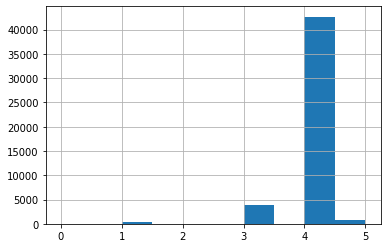

In [ ]:
df["time_sginature"].hist()

display columns histpgram

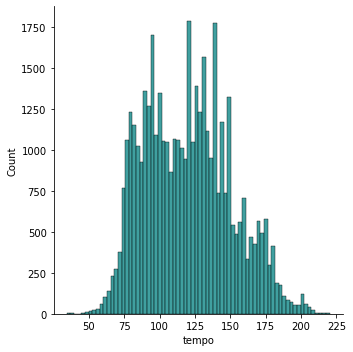

In [ ]:
# f1, axes1 = plt.subplots(3, 5, figsize=(12, 12))
# sns.distplot( df["popularity"] , color="teal", ax=axes1[0, 0])
# sns.distplot( df["acousticness"] , color="teal", ax=axes1[0, 1])
# sns.distplot( df["danceability"] , color="teal", ax=axes1[0, 2])
# sns.distplot( df["duration_ms"] , color="teal", ax=axes1[0, 3])
# sns.distplot( df["energy"] , color="teal", ax=axes1[0, 4])
# sns.distplot( df["instrumentalness"] , color="teal", ax=axes1[1, 0])
# sns.distplot( df["valence"] , color="teal", ax=axes1[1, 1])
# sns.distplot( df["liveness"] , color="teal", ax=axes1[1, 2])
# sns.distplot( df["loudness"] , color="teal", ax=axes1[1, 3])
# sns.distplot( df["speechiness"] , color="teal", ax=axes1[1, 4])
sns.displot( df["tempo"] , color="teal")
# sns.distplot( df["music_genre"] , color="teal", ax=axes1[2, 1])
# sns.distplot( df["key"] , color="teal", ax=axes1[2, 2])
# sns.distplot( df["mode"] , color="teal", ax=axes1[2, 3])

# f1.delaxes(axes1[2][4])
plt.show()

## Encode Categorial Variables To Numeric

In [ ]:
keys_dict = {'A':0, 'A#':0.5, 'B':1, 'C':1.5, 'C#':2,'D':2.5, 'D#':3, 'E':3.5, 'F':4, 'F#':4.5, 'G':5, 'G#':5.5}

In [ ]:
np.sort(df["key"].unique())

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

In [ ]:
enc = preprocessing.LabelEncoder()
new_col = pd.Series(enc.fit_transform(df["mode"]))
new_col.index = df.index
df["mode"] = new_col

new_col = pd.Series(df["key"].map(keys_dict))
new_col.index = df.index
df["key"] = new_col

one_hot = pd.get_dummies(df["music_genre"], prefix="genre")

# Join the encoded df
df = df.join(one_hot)

df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,time_sginature,genre_Alternative,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
instance_id,,,,,,,,,,,,,,,,,,,,,,,,,
32894.0,27.0,0.00468,0.652,NaN,0.941,0.79200,0.5,0.115,-5.201,1,0.0748,100.889,0.759,Electronic,4,0,0,0,0,0,1,0,0,0,0
46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,2.5,0.124,-7.043,1,0.0300,115.002,0.531,Electronic,4,0,0,0,0,0,1,0,0,0,0
30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,5.5,0.534,-4.617,0,0.0345,127.994,0.333,Electronic,4,0,0,0,0,0,1,0,0,0,0
62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,2.0,0.157,-4.498,0,0.2390,128.014,0.270,Electronic,4,0,0,0,0,0,1,0,0,0,0
24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,4.5,0.157,-6.266,0,0.0413,145.036,0.323,Electronic,4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,59.0,0.03340,0.913,NaN,0.574,0.00000,2.0,0.119,-7.022,0,0.2980,98.028,0.330,Hip-Hop,4,0,0,0,0,0,0,1,0,0,0
43557.0,72.0,0.15700,0.709,251860.0,0.362,0.00000,1.0,0.109,-9.814,0,0.0550,122.043,0.113,Hip-Hop,4,0,0,0,0,0,0,1,0,0,0
39767.0,51.0,0.00597,0.693,189483.0,0.763,0.00000,2.5,0.143,-5.443,0,0.1460,131.079,0.395,Hip-Hop,4,0,0,0,0,0,0,1,0,0,0


##Summerize null data

In [ ]:
print("Check if there are null values:")
display(df.isna().sum())

Check if there are null values:


popularity              0
acousticness            0
danceability            0
duration_ms          4710
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
speechiness             0
tempo                4733
valence                 0
music_genre             0
time_sginature          0
genre_Alternative       0
genre_Anime             0
genre_Blues             0
genre_Classical         0
genre_Country           0
genre_Electronic        0
genre_Hip-Hop           0
genre_Jazz              0
genre_Rap               0
genre_Rock              0
dtype: int64

## Data split

In [ ]:
X_train, X_test, y_train, y_test = split(df.drop("popularity", axis=1), df["popularity"] , test_size = 0.2 , random_state = 42, stratify=artists_df)

In [ ]:
print("train shape is:")
print(X_train.shape)
print("test shape is:")
print(X_test.shape)

train shape is:
(38123, 24)
test shape is:
(9531, 24)


##Fill missing values & Normalization

check std of tempo and duration in all data against by music genre. for the missing value.

In [ ]:
d_std_gl =  X_train["duration_ms"].std()
print("duration_ms std genral:",d_std_gl)
t_std_gl = X_train["tempo"].std()
print("tempo std genral:", t_std_gl)
for i in X_train["music_genre"].unique():
  d_std_g = X_train[X_train["music_genre"]==i]["duration_ms"].std()
  t_std_g = X_train[X_train["music_genre"]==i]["tempo"].std()
  print(i, d_std_g, d_std_g<d_std_gl, t_std_g, t_std_g<t_std_gl )


duration_ms std genral: 112425.27462877629
tempo std genral: 30.70019502856945
Blues 113995.64421192097 False 30.375093935100466 True
Alternative 61269.99582079208 True 30.301270142119844 True
Jazz 113435.39843914662 False 29.53368303983903 True
Anime 84635.14513997221 True 33.1711948871332 False
Electronic 163097.40604159693 False 26.423816485531237 True
Country 44866.68641803095 True 30.036142732685775 True
Hip-Hop 59012.09367352263 True 30.089797608148018 True
Rap 56634.8990980785 True 29.267348650739017 True
Classical 205496.21648734613 False 30.7747943804763 False
Rock 65775.06735112658 True 29.185029221566726 True


In [ ]:
def fill_missing_val_by_genre_mean(dataframe, mean_df, col):
  # Normalize missing values to average by genre type
  for genre in dataframe["music_genre"].unique():
      mean_by_genre_val = mean_df[col][mean_df.index==genre].values.tolist()[0]
      dataframe.loc[dataframe["music_genre"] == genre, col] = dataframe[col][dataframe["music_genre"] == genre].fillna(mean_by_genre_val)
      # dataframe.loc[np.isnan(dataframe.loc[dataframe["music_genre"] == genre, col]).index, col] = mean_by_genre_val
      # dataframe.loc[dataframe["music_genre"] == genre, col].fillna(mean_by_genre_val) #= dataframe.loc[df["music_genre"] == genre, col].replace({missing_value:mean_by_genre})
  dataframe[col] = dataframe[col].astype('float64')
  return dataframe

In [ ]:
# Finding averages by genre type
mean_by_genre = X_train.groupby("music_genre").mean()
for dff in [X_train, X_test]:
  #Change "tempo" to numeric
  # dff.drop(dff.loc[df["tempo"]=="?"].index, inplace=True)
  # dff['tempo'].astype('float64', copy=False)
  dff = fill_missing_val_by_genre_mean(dff, mean_by_genre, "tempo")
  # filling the missing values at duration ms with the average
  # dff.drop(dff.loc[df["duration_ms"]==-1.0].index, inplace=True)
  dff = fill_missing_val_by_genre_mean(dff, mean_by_genre, "duration_ms")

### Normalization

In [ ]:
# normalize popularity to arange(0,1)
# y_train/=100
# y_test/=100

In [ ]:
# min max normalize of "loudness", "tempo", "duration_ms"
scaler_dict = {}
# scaler = MinMaxScaler((0,1))
# cols_to_normal = ["loudness", "tempo", "duration_ms"]
# normalize duratiom to hours
X_train["duration_ms"] /=(1000*60*60)
X_test["duration_ms"] /=(1000*60*60)
for col in X_train.drop(["mode", "music_genre"], axis=1):
    scaler_dict[col] = MinMaxScaler((0,1))
    X = X_train.loc[:, col].values.reshape(-1, 1)
    X_train.loc[:, col] = scaler_dict[col].fit_transform(X)
    X = X_test.loc[:, col].values.reshape(-1, 1)
    X_test.loc[:, col] = scaler_dict[col].transform(X)
# normalize popularity to arange(0,1)
scaler_dict["popularity"] = MinMaxScaler((0,1))
y_train.update(pd.Series(scaler_dict["popularity"].fit_transform(y_train.values.reshape(-1, 1)).ravel(), index=y_train.index))
y_test.update(pd.Series(scaler_dict["popularity"].transform(y_test.values.reshape(-1, 1)).ravel(), index=y_test.index))

In [ ]:

X_test.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_sginature,genre_Alternative,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
count,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.00000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000,9531.000000
mean,0.303109,0.538578,0.047657,0.601631,0.181570,0.486861,0.186678,0.747662,0.354842,0.078467,0.462477,0.457307,0.783045,0.097157,0.10660,0.097891,0.097996,0.100199,0.102822,0.101353,0.095373,0.101039,0.099570
std,0.340370,0.192864,0.020533,0.263985,0.325742,0.313665,0.161829,0.121157,0.478491,0.111303,0.154973,0.249096,0.077351,0.296186,0.30862,0.297183,0.297325,0.300281,0.303743,0.301812,0.293745,0.301396,0.299441
min,-0.000001,0.000648,0.002240,0.000309,0.000000,0.000000,0.009522,0.071648,0.000000,0.000544,0.002248,0.019456,0.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019879,0.414940,0.037358,0.436490,0.000000,0.272727,0.087930,0.714225,0.000000,0.015005,0.338376,0.257056,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.139557,0.548791,0.044678,0.641357,0.000154,0.454545,0.118476,0.784249,0.000000,0.029249,0.465520,0.447581,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.537650,0.677245,0.052916,0.816171,0.149598,0.727273,0.241162,0.824828,1.000000,0.085028,0.567561,0.647177,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.983808,0.296982,0.998998,0.990964,1.000000,0.992932,0.952707,1.000000,0.983690,0.973554,0.994960,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Features extraction

### 1. Create key signature by key and mode:
https://dsmusic.com.au/wp-content/uploads/2012/01/key_sig_worksheet.pdf

In [ ]:
miss_list = []
for dff in [X_train, X_test]:
  dff["key_signature"] = np.zeros(len(dff))
  for i, row in dff.iterrows():
    m = row["mode"]
    
    k = scaler_dict["key"].inverse_transform([[row["key"]]])
    if m == 1: # minor
      if k == 0:
        dff.loc[i, "key_signature"] = 0
      if k == 3.5:
        dff.loc[i, "key_signature"] = 1
      if k == 1:
        dff.loc[i, "key_signature"] = 2
      if k == 4.5:
        dff.loc[i, "key_signature"] = 3
      if k == 2:
        dff.loc[i, "key_signature"] = 4
      if k == 5.5:
        dff.loc[i, "key_signature"] = 5
      if k == 3:
        dff.loc[i, "key_signature"] = 6
      if k == 0.5:
        dff.loc[i, "key_signature"] = 7
      if k == 2.5:
        dff.loc[i, "key_signature"] = 8
      if k == 5:
        dff.loc[i, "key_signature"] = 9
      if k == 1.5:
        dff.loc[i, "key_signature"] = 10
      if k == 4:
        dff.loc[i, "key_signature"] = 11


    if m == 0: #major
      if k == 1.5:
        dff.loc[i, "key_signature"] = 0
      if k == 5:
        dff.loc[i, "key_signature"] = 1
      if k == 2.5:
        dff.loc[i, "key_signature"] = 2
      if k == 0:
        dff.loc[i, "key_signature"] = 3
      if k == 3.5:
        dff.loc[i, "key_signature"] = 4
      if k == 1:
        dff.loc[i, "key_signature"] = 5
      if k == 4.5:
        dff.loc[i, "key_signature"] = 6
      if k == 2:
        dff.loc[i, "key_signature"] = 7
      if k == 4:
        dff.loc[i, "key_signature"] = 8
      if k == 0.5:
        dff.loc[i, "key_signature"] = 9
      if k == 3:
        dff.loc[i, "key_signature"] = 10
      if k == 5.5:
        dff.loc[i, "key_signature"] = 11
# Normalize new feuture
scaler_dict["key_signature"] = MinMaxScaler((0,1))
X = X_train.loc[:, "key_signature"].values.reshape(-1, 1)
X_train.loc[:, "key_signature"] = scaler_dict["key_signature"].fit_transform(X)
X = X_test.loc[:, "key_signature"].values.reshape(-1, 1)
X_test.loc[:, "key_signature"] = scaler_dict["key_signature"].transform(X)

### 2.Textual feutures extraction by track names:

In [ ]:
!pip install wordcloud

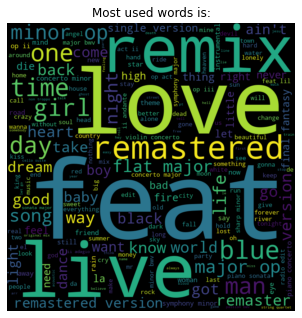

In [ ]:
#The most common words
track_name_df = track_name_df.str.lower()
wordcloud = WordCloud(width = 800, height = 800,background_color ='black',min_font_size = 10).generate(" ".join(track_name_df.values))
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most used words is:",fontsize=12)
plt.show()

In [ ]:
# import gensim
# import pprint
# from gensim import corpora
# # from gensim.utils import simple_preprocess

[('feat', 1665), ('love', 1093), ('live', 926), ('remix', 923), ('remastered', 694), ('blue', 392), ('time', 378), ('one', 357), ('day', 348), ('girl', 345), ('man', 324), ('minor op', 316), ('major op', 303), ('song', 299), ('night', 289), ('life', 284), ('flat major', 281), ('way', 263), ('version', 262), ('good', 242), ('go', 239), ('world', 237), ('got', 237), ('remaster', 235), ('know', 232), ('back', 227), ('heart', 222), ('dream', 206), ('take', 205), ('come', 204), ('black', 203), ('baby', 192), ('remastered version', 192), ('want', 183), ('boy', 179), ('light', 177), ("ain't", 175), ('dance', 174), ('single version', 170), ('thing', 165), ('fire', 156), ('little', 153), ('high', 149), ('never', 148), ('let', 144), ('final fantasy', 144), ('feel', 143), ('right', 142), ('die', 141), ('la', 141), ('bad', 139), ('need', 137), ('symphony minor', 137), ('piano concerto', 136), ('eye', 135), ('mind', 134), ('still', 132), ('new', 130), ('road', 130), ('theme', 129), ('now', 128), ('

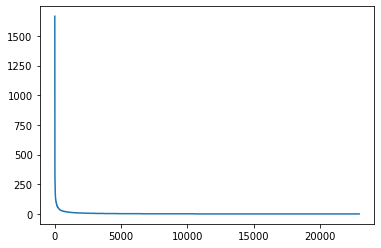

In [ ]:
# print(track_name_df.values)
# doc_tokenized = [simple_preprocess(doc) for doc in track_name_df.values]
# # print(doc_tokenized)
# dictionary = corpora.Dictionary()
# BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
# # print(BoW_corpus)

# id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
# # print(id_words)
# # id_words = np.asarray(id_words)
# # plt.plot(id_words)
x = WordCloud().process_text(" ".join(track_name_df.values))
# print(x)
x_sorted = sorted(x.items(), key=lambda x: x[1], reverse=True)
print(x_sorted)
keys = x.keys()
vals = x.values()
print(f"unique words count {len(x)}")
plt.plot(sorted(vals)[::-1])

In [ ]:
num_of_words = 10
words_feutures = [t[0] for t in x_sorted[:num_of_words]]
print(words_feutures)

['feat', 'love', 'live', 'remix', 'remastered', 'blue', 'time', 'one', 'day', 'girl']


In [ ]:
for word in words_feutures:
  X_train[f"{word}_term"] = np.zeros(len(X_train))
  X_test[f"{word}_term"] = np.zeros(len(X_test))
for dff in [X_train, X_test]:
  for i, row in dff.iterrows():
    for word in words_feutures:
        if track_name_df.loc[i].__contains__(word):
            dff.loc[i, f"{word}_term"] = 1

### 3.Create is popularity artist flag by mean of popularity

In [ ]:
# describe artists by their popularity
joined_train_df = pd.concat([X_train, artists_df, y_train], axis=1, join="inner")
joined_test_df = pd.concat([X_test, artists_df, y_test], axis=1, join="inner")
artist_pop = joined_train_df.groupby("artist_name").mean()["popularity"]
artist_pop.describe()

count    4517.000000
mean        0.464012
std         0.127801
min         0.000000
25%         0.374570
50%         0.465979
75%         0.564433
max         0.824742
Name: popularity, dtype: float64

In [ ]:
# create is popular column by the mean value
artist_pop_bool = pd.Series(data=artist_pop > artist_pop.mean(), name="is_popular_artist")
artist_pop_bool = artist_pop_bool.astype('int')

In [ ]:
joined_train_df = pd.merge(joined_train_df, artist_pop_bool, left_on="artist_name", right_index=True)
joined_test_df = pd.merge(joined_test_df, artist_pop_bool, left_on="artist_name", right_index=True)
X_train = pd.merge(X_train, joined_train_df["is_popular_artist"], left_index=True, right_index=True)
X_test = pd.merge(X_test, joined_test_df["is_popular_artist"], left_index=True, right_index=True)
display(joined_train_df.groupby("is_popular_artist").mean())
display(joined_test_df.groupby("is_popular_artist").mean())

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_sginature,genre_Alternative,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock,key_signature,feat_term,love_term,live_term,remix_term,remastered_term,blue_term,time_term,one_term,day_term,girl_term,popularity
is_popular_artist,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.393809,0.483049,0.050906,0.550847,0.29817,0.490321,0.187606,0.712717,0.360394,0.052796,0.453837,0.436144,0.77370,0.024262,0.190897,0.164742,0.183375,0.079629,0.173331,0.011500,0.139655,0.011792,0.020817,0.383033,0.033967,0.028533,0.036976,0.025087,0.018682,0.013538,0.013635,0.027853,0.015528,0.006793,0.356208
1,0.201237,0.601365,0.043953,0.662262,0.04303,0.482189,0.186434,0.787988,0.357294,0.108231,0.468032,0.484400,0.79139,0.186126,0.000285,0.022095,0.002512,0.124921,0.018327,0.206566,0.042878,0.209306,0.186983,0.388934,0.085812,0.029518,0.014673,0.015244,0.019812,0.005024,0.013417,0.033000,0.015644,0.010277,0.573020


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_sginature,genre_Alternative,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock,key_signature,feat_term,love_term,live_term,remix_term,remastered_term,blue_term,time_term,one_term,day_term,girl_term,popularity
is_popular_artist,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.390757,0.484736,0.050658,0.551595,0.299481,0.485867,0.187217,0.713391,0.356588,0.052748,0.457994,0.434508,0.775942,0.021959,0.197241,0.160513,0.179363,0.077536,0.174504,0.009911,0.13972,0.012437,0.026817,0.377539,0.035367,0.032258,0.036145,0.025262,0.018850,0.013408,0.013797,0.027983,0.012825,0.006413,0.358150
1,0.200251,0.601764,0.044135,0.660350,0.043197,0.488027,0.186045,0.787881,0.352794,0.108650,0.467738,0.484062,0.791380,0.185405,0.000228,0.024401,0.002509,0.126796,0.018700,0.208666,0.04333,0.205017,0.184949,0.385757,0.091448,0.027138,0.014367,0.016192,0.019612,0.005701,0.010034,0.034664,0.016192,0.007754,0.569933


In [ ]:
joined_train_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,time_sginature,genre_Alternative,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock,key_signature,feat_term,love_term,live_term,remix_term,remastered_term,blue_term,time_term,one_term,day_term,girl_term,artist_name,popularity,is_popular_artist
instance_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
62348.0,0.057027,0.258420,0.095269,0.622323,0.007490,0.272727,0.671827,0.764225,1,0.026204,0.468971,0.412298,Blues,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beth Hart,0.206186,0
50928.0,0.007107,0.568221,0.042523,0.757566,0.000068,0.000000,0.165935,0.786887,1,0.024464,0.557928,0.790323,Blues,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beth Hart,0.298969,0
75999.0,0.017870,0.372841,0.053224,0.544183,0.000000,0.454545,0.133622,0.831699,0,0.013374,0.440921,0.276210,Blues,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beth Hart,0.319588,0
42343.0,0.398594,0.309154,0.079162,0.298743,0.000062,0.818182,0.705149,0.674621,0,0.041209,0.618688,0.069657,Blues,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beth Hart,0.257732,0
25920.0,0.082931,0.356649,0.049956,0.541178,0.000000,0.000000,0.112417,0.768931,0,0.027183,0.233159,0.151210,Blues,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beth Hart,0.329897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50317.0,0.178714,0.441926,0.018932,0.371874,0.912651,0.090909,0.139681,0.684603,0,0.328042,0.467964,0.672379,Electronic,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.818182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ozoyo,0.350515,0
34963.0,0.838353,0.287565,0.052408,0.394916,0.000113,0.181818,0.081417,0.800295,0,0.012939,0.473533,0.396169,Alternative,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kyle Dion,0.494845,1
76810.0,0.076204,0.525043,0.045534,0.698460,0.000132,0.272727,0.052134,0.834180,0,0.083071,0.204756,0.620968,Alternative,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kyle Dion,0.577320,1


## Heatmap
A heat map (or heatmap) for data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

In [ ]:
corr_df = joined_train_df.corr()
corr_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_sginature,genre_Alternative,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock,key_signature,feat_term,love_term,live_term,remix_term,remastered_term,blue_term,time_term,one_term,day_term,girl_term,popularity,is_popular_artist
acousticness,1.000000,-0.350158,0.090177,-0.792455,0.390114,0.006947,-0.107698,-0.732546,-0.027587,-0.163529,-0.237036,-0.272251,-0.205076,-0.139193,-0.016521,0.009408,0.558882,-0.035350,-0.181362,-0.124397,0.180218,-0.133522,-0.113090,-0.003943,-0.095478,0.006450,0.093397,-0.085150,0.015498,0.043447,0.003927,-0.009975,0.006555,-0.014354,-0.294550,-0.280320
danceability,-0.350158,1.000000,-0.196565,0.266785,-0.303500,-0.021293,-0.048834,0.393891,0.052610,0.278757,-0.003083,0.431810,0.204387,-0.035494,-0.163951,-0.056043,-0.470812,0.037238,0.112368,0.297687,0.052424,0.260979,-0.036675,0.043270,0.167390,0.006197,-0.117807,0.066895,-0.033773,-0.001987,0.003499,0.012437,0.015718,0.012513,0.359628,0.306004
duration_ms,0.090177,-0.196565,1.000000,-0.094190,0.165074,-0.002346,0.021367,-0.139373,0.007300,-0.106942,-0.047841,-0.166835,-0.020737,-0.035544,-0.046294,0.026511,0.199763,-0.087515,0.078797,-0.077742,0.054572,-0.085953,-0.024639,-0.007871,-0.029798,-0.009334,0.115573,0.013467,0.017811,0.004428,-0.000466,-0.008752,-0.006148,-0.021023,-0.114549,-0.155747
energy,-0.792455,0.266785,-0.094190,1.000000,-0.391191,-0.000735,0.185841,0.838976,0.019638,0.158637,0.262246,0.398943,0.208765,0.139744,0.078955,0.015113,-0.542366,0.047777,0.178078,0.055751,-0.152662,0.063170,0.112248,0.002627,0.062136,-0.005243,-0.062816,0.085822,0.001950,-0.033317,-0.002652,0.004896,-0.005279,0.019884,0.219080,0.209458
instrumentalness,0.390114,-0.303500,0.165074,-0.391191,1.000000,0.003666,-0.097308,-0.531827,0.062275,-0.201914,-0.132791,-0.269990,-0.130026,-0.121249,0.102350,-0.090607,0.436676,-0.180232,0.167022,-0.175254,0.167603,-0.178600,-0.127133,-0.000668,-0.105865,-0.043125,-0.001102,-0.001312,-0.015221,-0.005506,-0.009951,-0.032733,-0.009260,-0.034981,-0.369174,-0.390114
key,0.006947,-0.021293,-0.002346,-0.000735,0.003666,1.000000,-0.008085,-0.002618,-0.053529,-0.016026,-0.004404,-0.006574,0.000727,0.000581,0.013505,-0.006014,0.004310,0.014099,-0.005564,-0.009454,0.009825,-0.009072,-0.012206,0.280500,-0.008989,0.001246,-0.004522,0.001480,0.001494,0.006656,0.000272,-0.002350,-0.009395,-0.001229,-0.005735,-0.012895
liveness,-0.107698,-0.048834,0.021367,0.185841,-0.097308,-0.008085,1.000000,0.125172,-0.013965,0.116260,0.036744,0.055176,0.025617,0.007558,-0.002655,0.081997,-0.070070,-0.014569,0.033375,0.019437,-0.045807,0.006429,-0.016895,-0.015119,0.006406,0.005794,0.313507,0.004858,-0.003282,0.008779,0.008352,0.007933,-0.002162,0.003276,-0.038461,-0.003549
loudness,-0.732546,0.393891,-0.139373,0.838976,-0.531827,-0.002618,0.125172,1.000000,0.010579,0.166421,0.241443,0.342408,0.209229,0.139958,0.061786,0.007612,-0.683433,0.099751,0.115557,0.123637,-0.105126,0.133319,0.103431,0.017630,0.101752,0.014528,-0.091679,0.075002,-0.008241,-0.019316,0.003028,0.016288,0.003142,0.025683,0.322095,0.309576
mode,-0.027587,0.052610,0.007300,0.019638,0.062275,-0.053529,-0.013965,0.010579,1.000000,0.079058,-0.023410,-0.024961,0.023114,0.007936,0.013836,-0.052795,-0.017539,-0.161999,0.077026,0.057708,0.074212,0.068280,-0.067689,0.016317,0.037774,-0.004127,-0.031458,0.029501,-0.025010,-0.018336,-0.004367,0.000149,-0.012905,-0.011910,0.017847,-0.003221
speechiness,-0.163529,0.278757,-0.106942,0.158637,-0.201914,-0.016026,0.116260,0.166421,0.079058,1.000000,0.062144,0.058479,0.075227,-0.018556,-0.097784,-0.103622,-0.140564,-0.149033,0.014782,0.377519,-0.064233,0.305534,-0.131123,0.047125,0.163919,-0.038035,-0.029529,0.061279,-0.041611,-0.024442,-0.007311,-0.011962,-0.012327,-0.016997,0.227374,0.248756


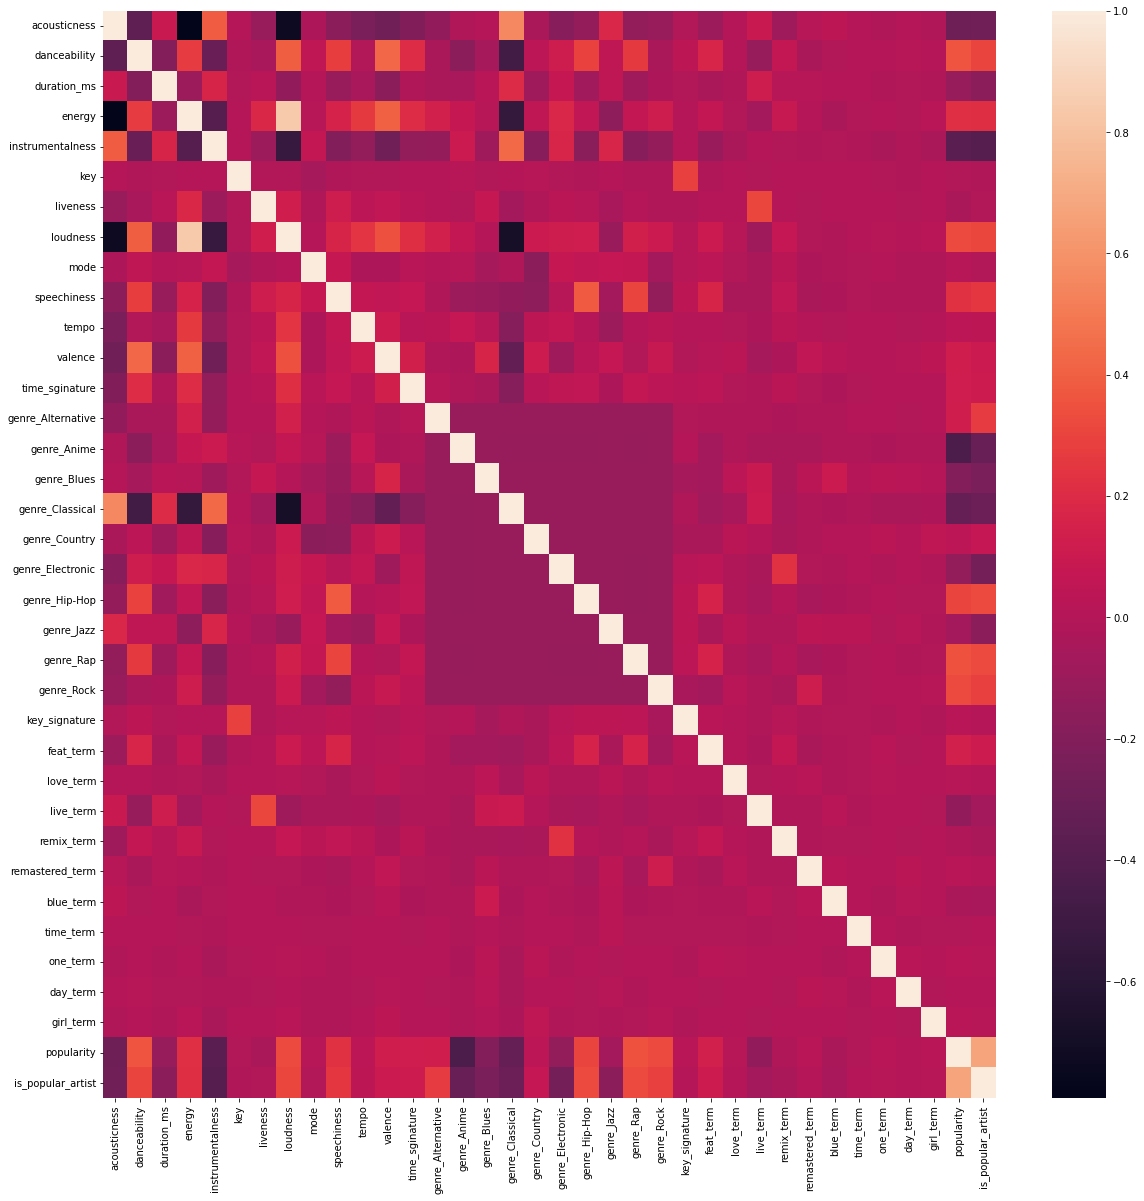

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, ax=ax)


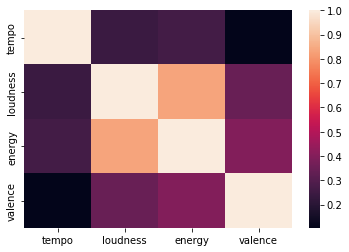

In [ ]:
# for x in [X_train, X_test]:
#   x["vibe"] = ((x["energy"]+x["loudness"])/(x["acousticness"]+x["instrumentalness"]))
#   X = x.loc[:, "vibe"].values.reshape(-1, 1)
#   x.loc[:, "vibe"] = scaler.fit_transform(X)
#   print(x["vibe"].describe())
# X_train["energy"].hist()
# X_train["loudness"].hist(alpha=0.6)
# X_train["tempo"].hist(alpha=0.6)
sns.heatmap(corr_df.loc[["tempo","loudness","energy", "valence"], ["tempo","loudness","energy", "valence"]])

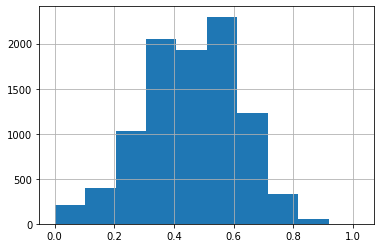

In [ ]:
y_test.hist()

###Distribution after preperation

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

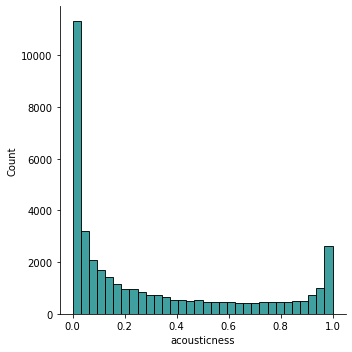

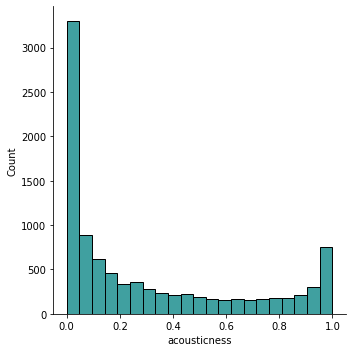

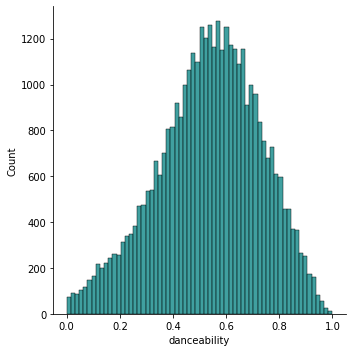

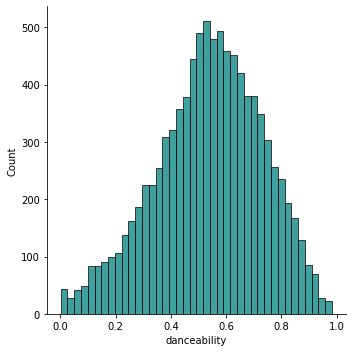

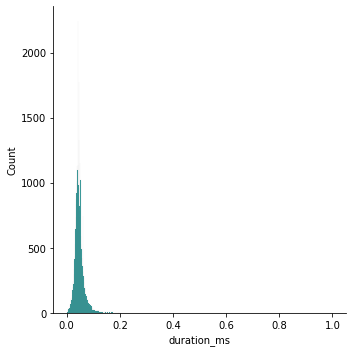

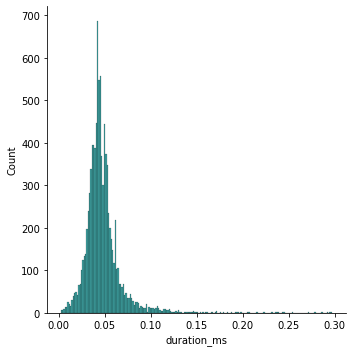

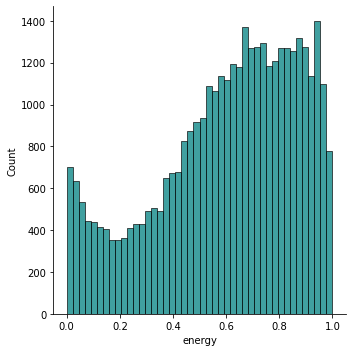

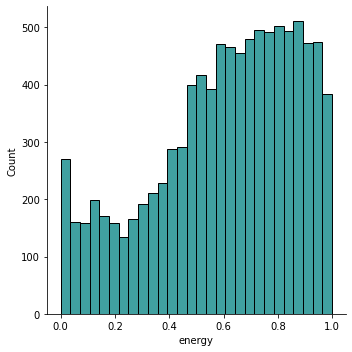

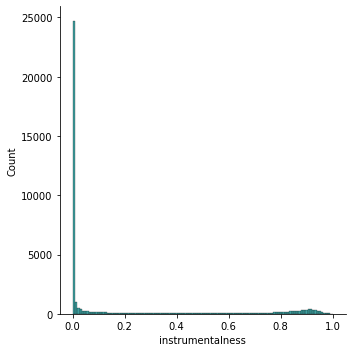

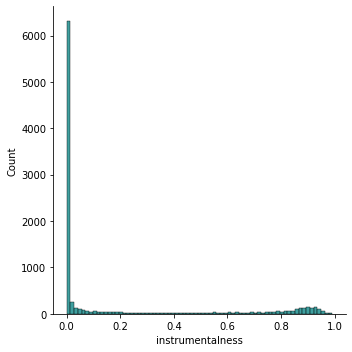

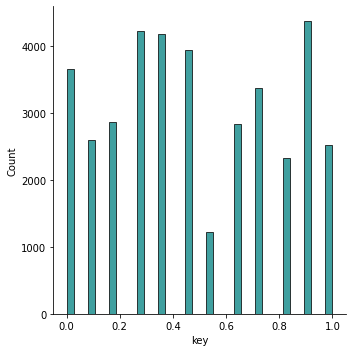

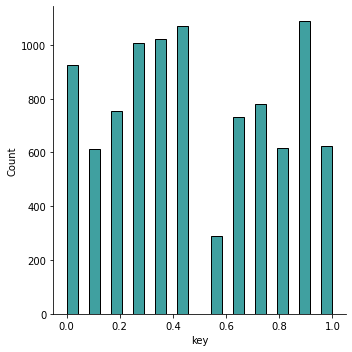

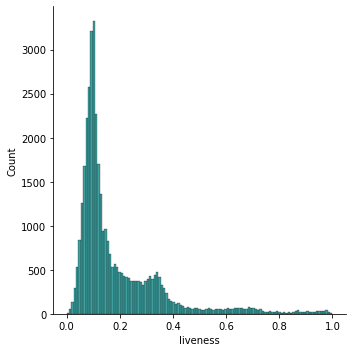

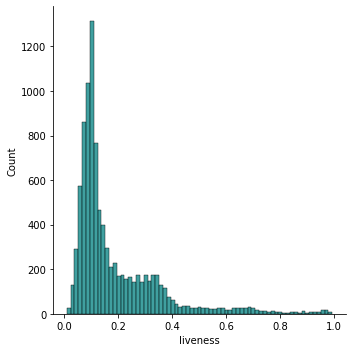

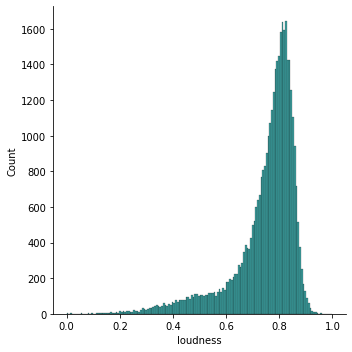

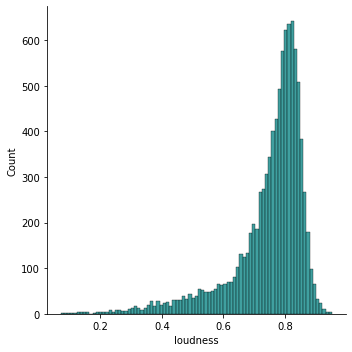

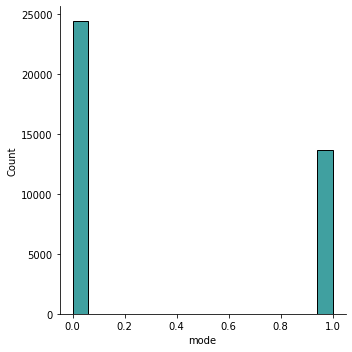

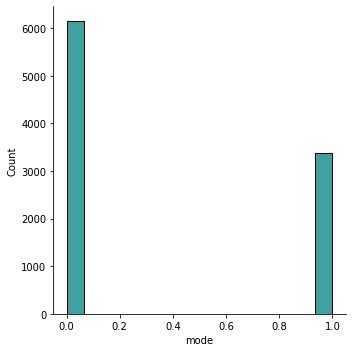

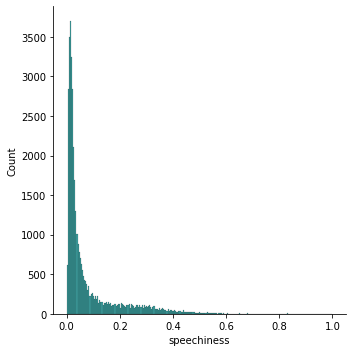

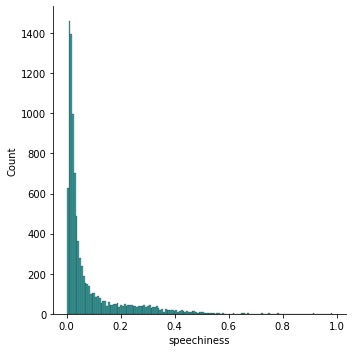

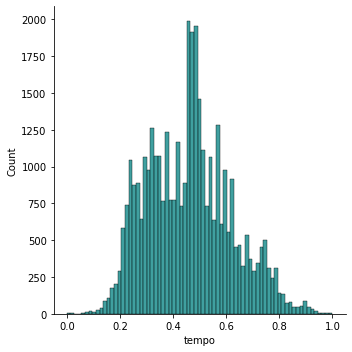

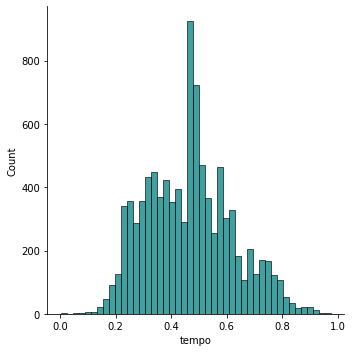

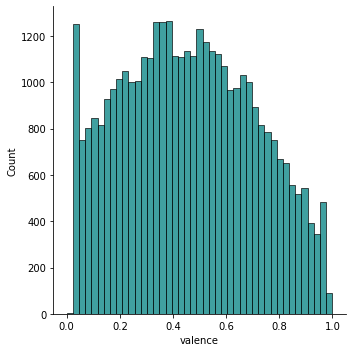

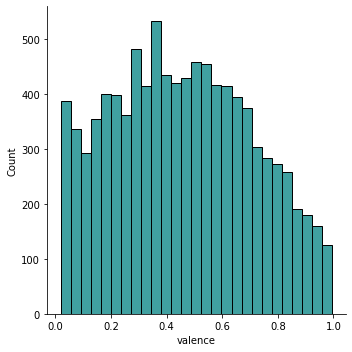

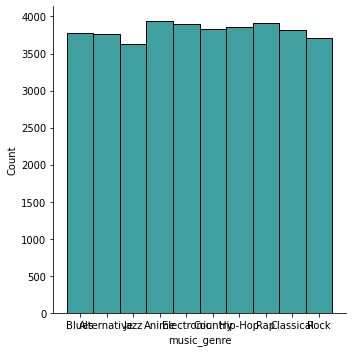

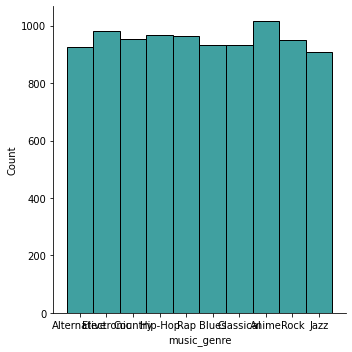

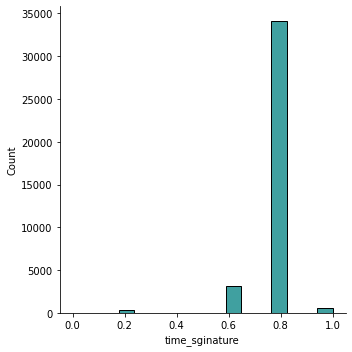

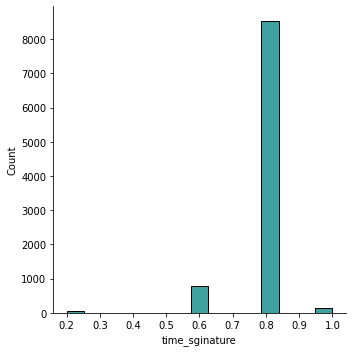

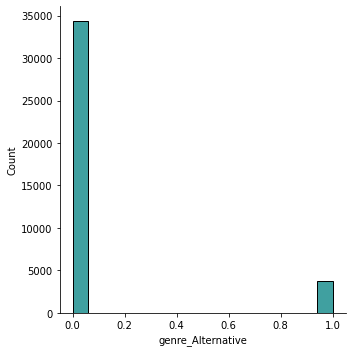

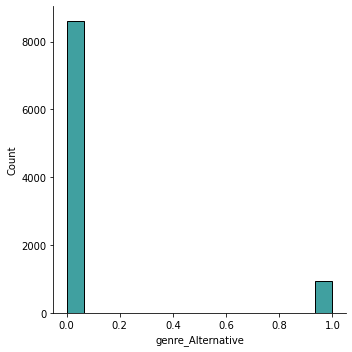

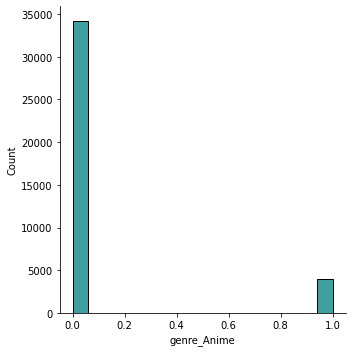

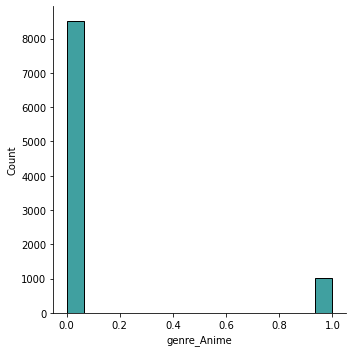

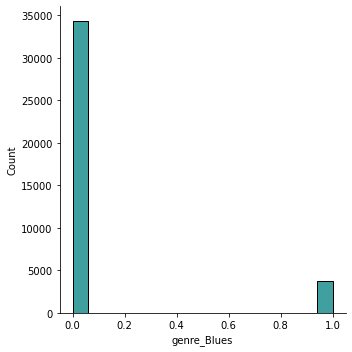

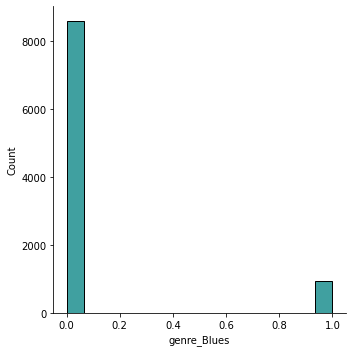

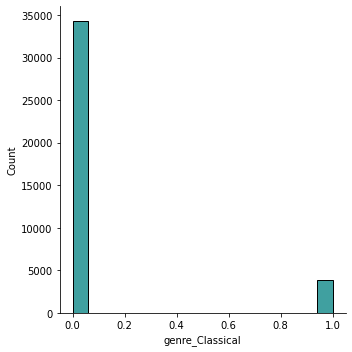

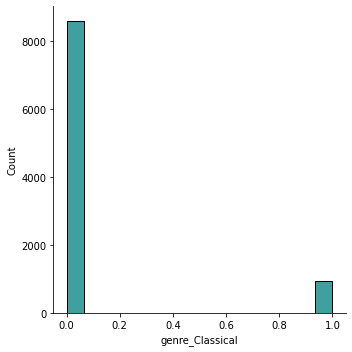

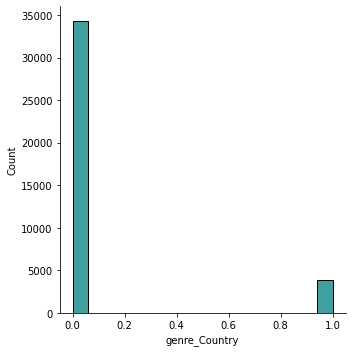

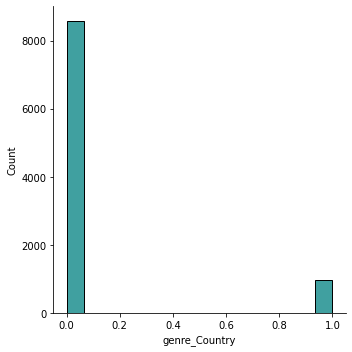

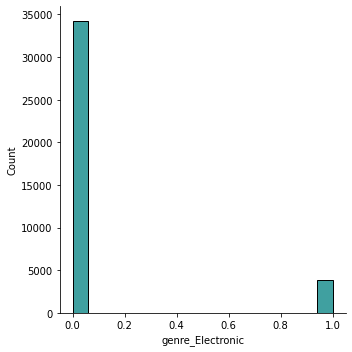

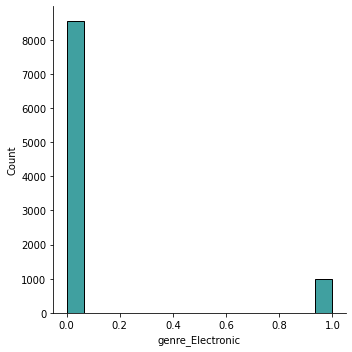

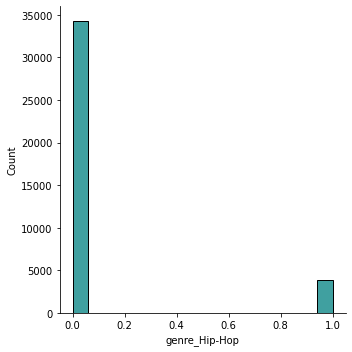

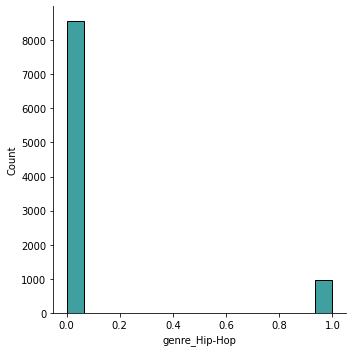

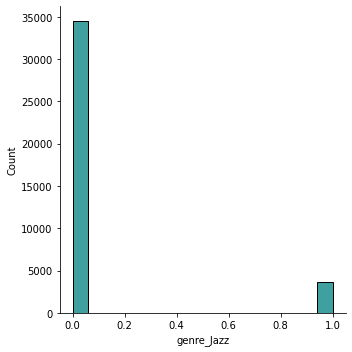

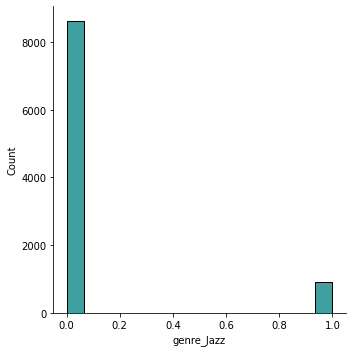

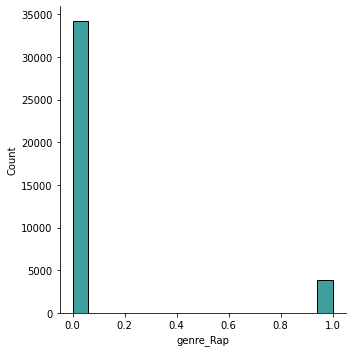

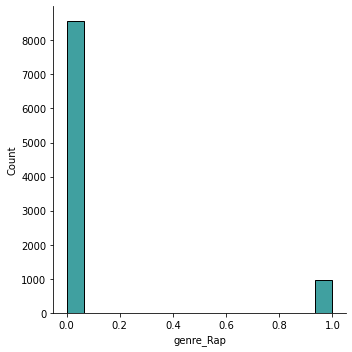

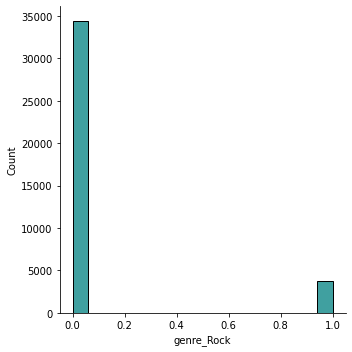

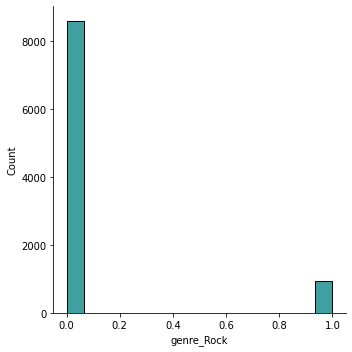

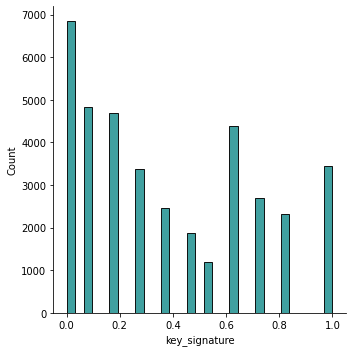

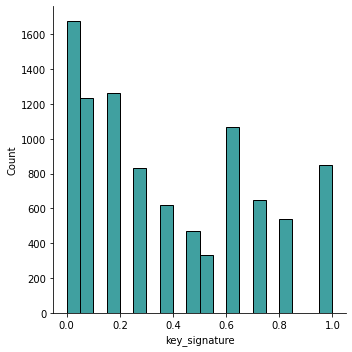

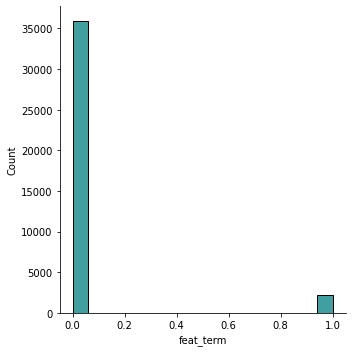

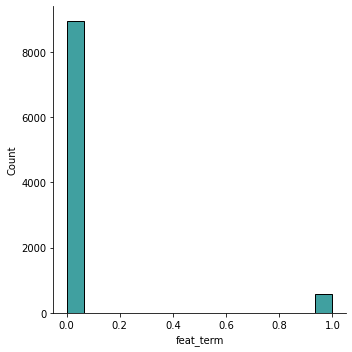

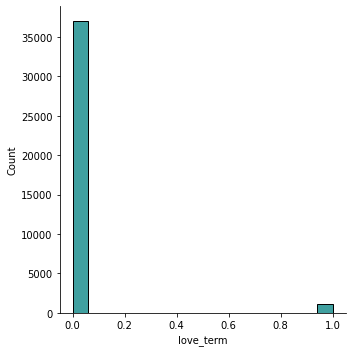

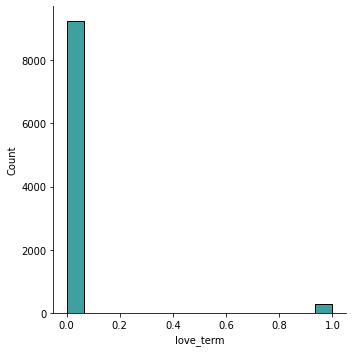

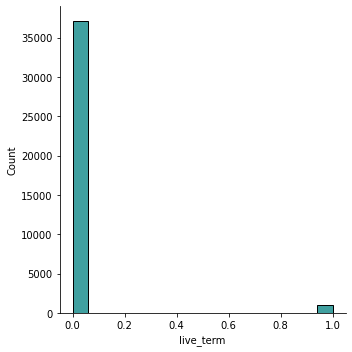

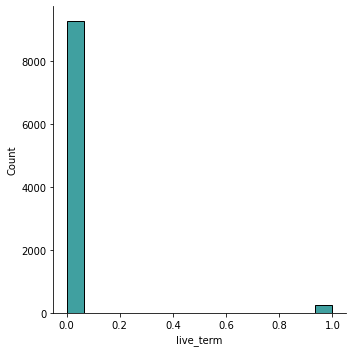

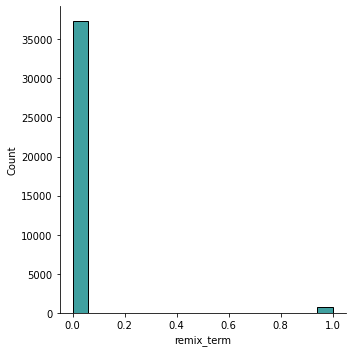

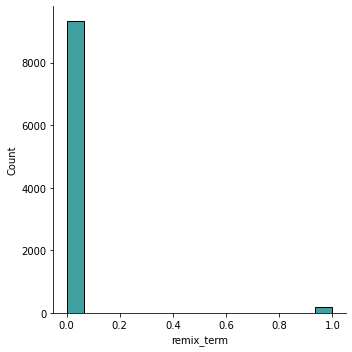

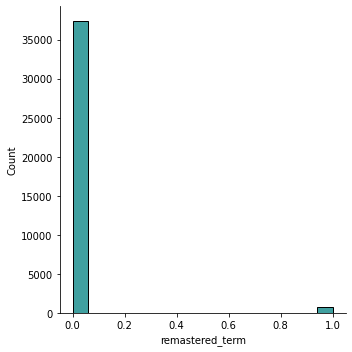

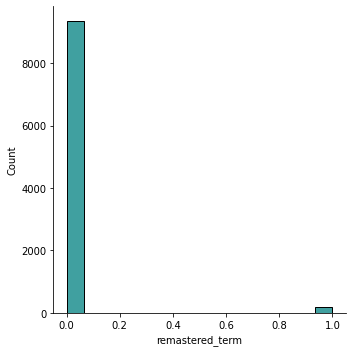

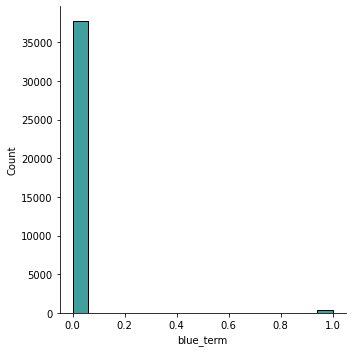

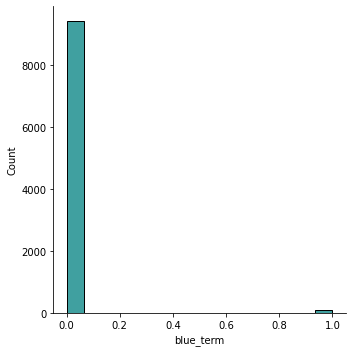

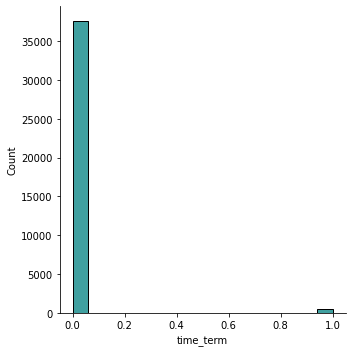

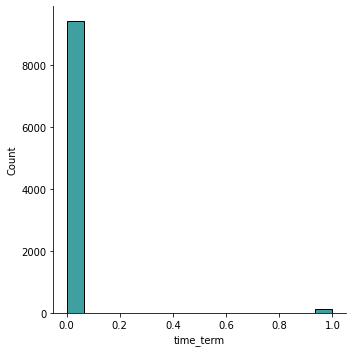

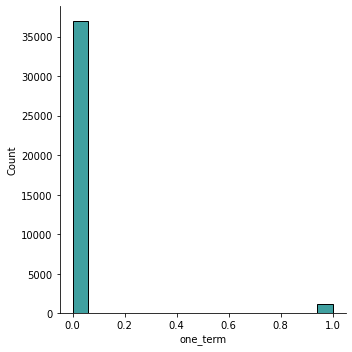

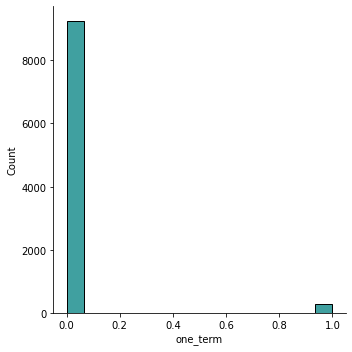

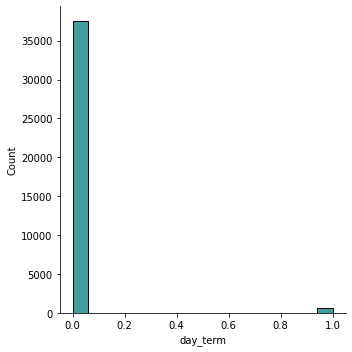

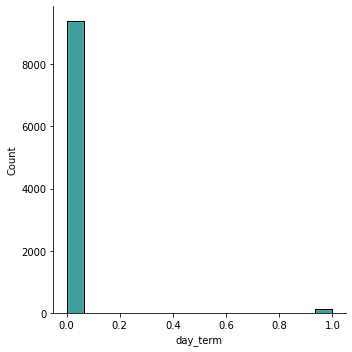

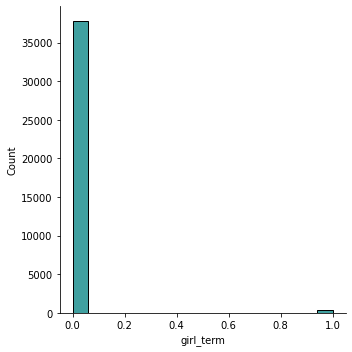

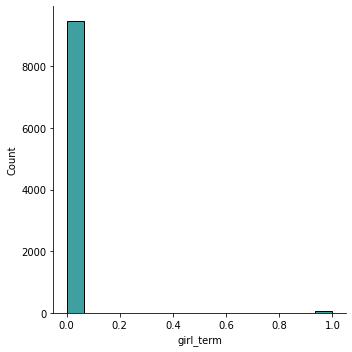

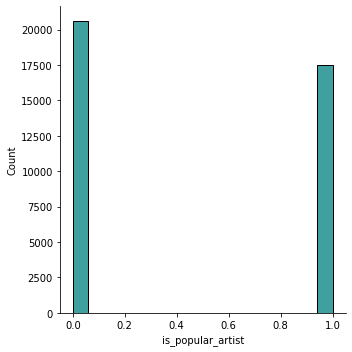

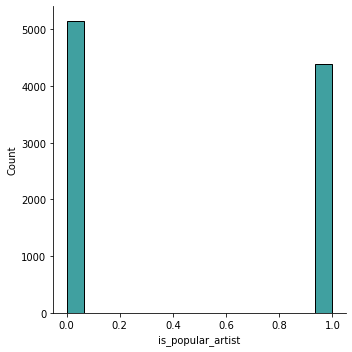

In [ ]:
for col, i in zip(X_train, range(len(axes.ravel()))):
  sns.displot( X_train[col] , color="teal")
  sns.displot( X_test[col] , color="teal")

# **Modeling & Evaluation**

In [ ]:
# Drop column music_genre as it is now encoded
X_train.drop('music_genre',axis = 1, inplace=True)
X_test.drop('music_genre',axis = 1, inplace=True)

In [ ]:
X_train

## Models for continuous values:

### (1) Linear Regression

In [ ]:
LR = LinearRegression()
# Fit the model and
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.5f}")

#Predicting with the model
y_test_pred = LR.predict(X_test)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.5f}")
LR_mae = mean_absolute_error(y_test_pred, y_test)
print('Linear Regression MAE: %.4f' % LR_mae)
print('Linear Regression R squared": %.4f' % LR.score(X_test, y_test))

RMSE Train = 0.09580
RMSE Test = 0.09784
Linear Regression MAE: 0.0738
Linear Regression R squared": 0.6415


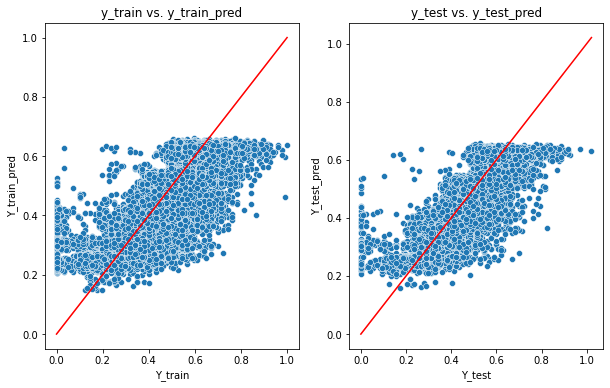

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0])
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1])
sns.lineplot(x=y_train, y=y_train, color='red', ax=ax[0])
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax[1])
for a, kind in zip(ax.flatten(), ['train', "test"]):
  a.set_xlabel(f'Y_{kind}')
  a.set_ylabel(f'Y_{kind}_pred')
  a.set_title(f'y_{kind} vs. y_{kind}_pred')
plt.show()

In [ ]:
X100 = shap.utils.sample(X_train, 100) # 100 instances for use as the background distribution
explainer = shap.Explainer(LR.predict, X100)
shap_values = explainer(X_train)

Permutation explainer: 38124it [29:10, 21.65it/s]                           


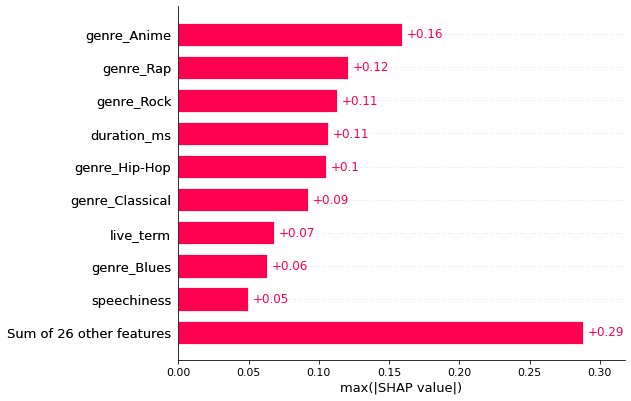

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

### (2) NN - Multi-layer Perceptron Regressor (MLPRegressor)

In [ ]:
mlp_regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_test_pred = mlp_regr.predict(X_test)
y_train_pred = mlp_regr.predict(X_train)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_temp.head()

,Actual,Predicted
instance_id,,
46142.0,0.505155,0.522626
28635.0,0.371134,0.382763
74980.0,0.608247,0.494828
87528.0,0.628866,0.597344
47749.0,0.577320,0.519050


RMSE Train = 0.09282
RMSE Test = 0.09684
MLPRegressor MAE: 0.0727
MLPRegressor R squared": 0.6488


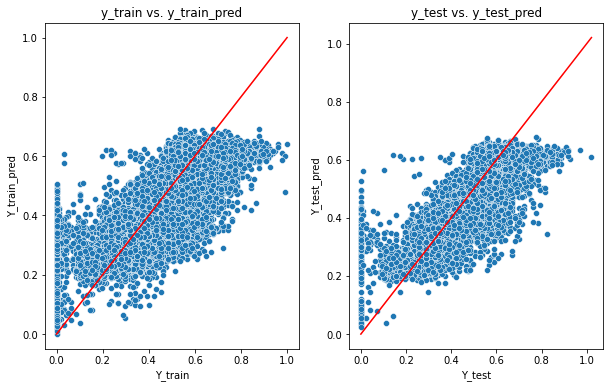

In [ ]:
mlp_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {mlp_rmse:.5f}")
mlp_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {mlp_rmse:.5f}")
nn_mae = mean_absolute_error(y_test_pred, y_test)
print('MLPRegressor MAE: %.4f' % nn_mae)
print('MLPRegressor R squared": %.4f' % mlp_regr.score(X_test, y_test))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0] = sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0])
ax[1] = sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1])
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax[1])
sns.lineplot(x=y_train, y=y_train, color='red', ax=ax[0])
for a, kind in zip(ax.flatten(), ['train', "test"]):
  # sns.lineplot(x=y_test, y=y_test, color='red', ax=a)
  a.set_xlabel(f'Y_{kind}')
  a.set_ylabel(f'Y_{kind}_pred')
  a.set_title(f'y_{kind} vs. y_{kind}_pred')
plt.show()

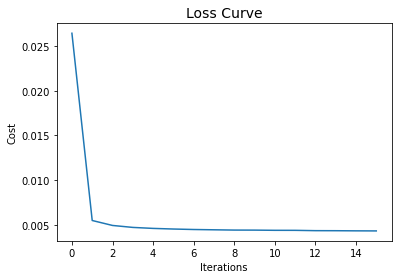

In [ ]:
plt.plot(mlp_regr.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# y_train[y_train>0.6]

### (3) Lasso

In [ ]:
clf = Lasso(alpha=0.000001, max_iter=10000).fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_temp.head()

,Actual,Predicted
instance_id,,
46142.0,0.505155,0.528545
28635.0,0.371134,0.392323
74980.0,0.608247,0.504960
87528.0,0.628866,0.548199
47749.0,0.577320,0.527642


RMSE Train = 0.09580
RMSE Test = 0.09784
Lasso MAE: 0.0738
Lasso R squared": 0.6415


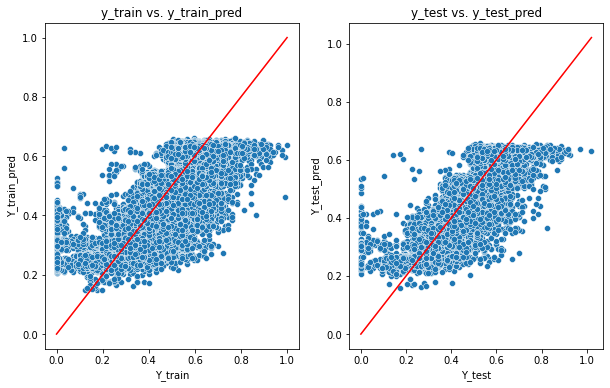

In [ ]:
lasso_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {lasso_rmse:.5f}")
lasso_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {lasso_rmse:.5f}")
lasso_mae = mean_absolute_error(y_test_pred, y_test)
print('Lasso MAE: %.4f' % lasso_mae)
print('Lasso R squared": %.4f' % clf.score(X_test, y_test))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0] = sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0])
ax[1] = sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1])
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax[1])
sns.lineplot(x=y_train, y=y_train, color='red', ax=ax[0])
for a, kind in zip(ax.flatten(), ['train', "test"]):
  # sns.lineplot(x=y_test, y=y_test, color='red', ax=a)
  a.set_xlabel(f'Y_{kind}')
  a.set_ylabel(f'Y_{kind}_pred')
  a.set_title(f'y_{kind} vs. y_{kind}_pred')
plt.show()

### Grid search for MLP

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_regr, parameter_space, n_jobs=-1, cv=[(slice(None), slice(None))], verbose=5)
clf.fit(X_train, y_train)

Fitting 1 folds for each of 48 candidates, totalling 48 fits


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=MLPRegressor(max_iter=500, random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=5)

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


RMSE Train = 0.09158
RMSE Test = 0.09582
MLPRegressor_GRID_SEARCH MAE: 0.0723
MLPRegressor_GRID_SEARCH R squared": 0.6561


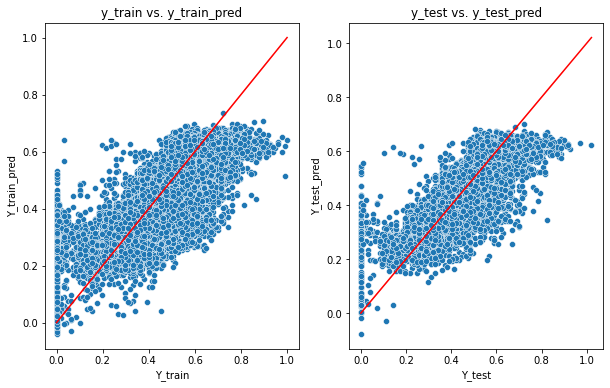

In [ ]:
mlp_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {mlp_rmse:.5f}")
mlp_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {mlp_rmse:.5f}")
nn_mae = mean_absolute_error(y_test_pred, y_test)
print('MLPRegressor_GRID_SEARCH MAE: %.4f' % nn_mae)
print('MLPRegressor_GRID_SEARCH R squared": %.4f' % clf.score(X_test, y_test))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0] = sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0])
ax[1] = sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1])
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax[1])
sns.lineplot(x=y_train, y=y_train, color='red', ax=ax[0])
for a, kind in zip(ax.flatten(), ['train', "test"]):
  # sns.lineplot(x=y_test, y=y_test, color='red', ax=a)
  a.set_xlabel(f'Y_{kind}')
  a.set_ylabel(f'Y_{kind}_pred')
  a.set_title(f'y_{kind} vs. y_{kind}_pred')
plt.show()

## Models for categorical values:
Try categorial popularity

### The effect of the features on the popularity

In [ ]:
# data understanding
print(y_train.quantile(1/3))
print(y_train.quantile(2/3))
print(y_train.median())

0.38144329896907214
0.5360824742268041
0.4639175257731959


In [ ]:
f_q = y_train.quantile(1/3)
l_q = y_train.quantile(2/3)

def convert(number):
  if number <=f_q:
    return "Low"
  if f_q < number < l_q:
    return "Moderate"
  else:
    return "High"

In [ ]:
# categorization
y_train_cat = y_train.apply(convert)
y_test_cat = y_test.apply(convert)

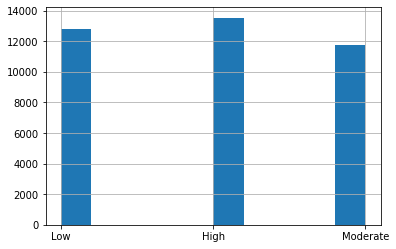

In [ ]:
y_train_cat.hist()

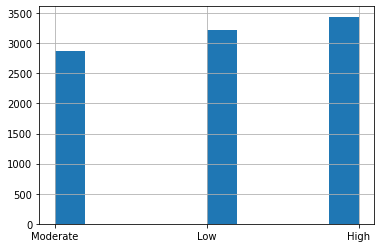

In [ ]:
y_test_cat.hist()

In [ ]:
#map clasess to numbers
classes_dict = {"Low": 0, "Moderate": 1, "High": 2}
y_train_cat = y_train_cat.map(classes_dict)
y_test_cat = y_test_cat.map(classes_dict)

### (1) Logistic Regression

In [ ]:
from sklearn.metrics import f1_score
LR = LogisticRegression(max_iter=200)
# Fit the model and
LR.fit(X_train, y_train_cat)

# Train Predicting with the model
y_train_pred = LR.predict(X_train)
print("Accuracy score of train set is: ", metrics.accuracy_score(y_train_cat,y_train_pred))
#Predicting with the model
y_test_pred = LR.predict(X_test)
# print("Accuracy score of test set is: ", metrics.accuracy_score(y_test_cat,y_test_pred))
# print("Precision score of test set is: ", metrics.precision_score(y_test_cat,y_test_pred,average='micro'))
# print("Recall score of test set is: ", metrics.recall_score(y_test_cat,y_test_pred, average='micro'))
# print("f-measure score of test set is: ", metrics.f1_score(y_test_cat,y_test_pred, average='micro'))



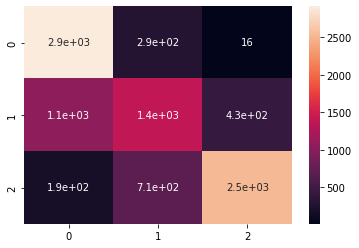

              precision    recall  f1-score   support

           0      0.701     0.904     0.790      3221
           1      0.579     0.483     0.527      2869
           2      0.850     0.737     0.790      3441

    accuracy                          0.717      9531
   macro avg      0.710     0.708     0.702      9531
weighted avg      0.718     0.717     0.711      9531



In [ ]:
def run_metrics():
  # Print the confusion matrix
  cm = confusion_matrix(y_test_cat, y_test_pred)
  sns.heatmap(cm, annot=True)
  plt.show()
  # Print the precision and recall, among other metrics
  print(metrics.classification_report(y_test_cat, y_test_pred, digits=3))
run_metrics()

### (2) Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train_cat)

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

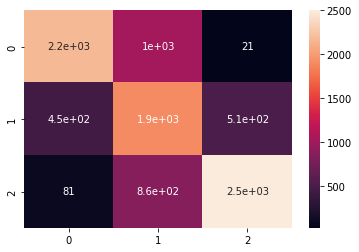

              precision    recall  f1-score   support

           0      0.803     0.676     0.734      3221
           1      0.503     0.664     0.573      2869
           2      0.825     0.727     0.772      3441

    accuracy                          0.691      9531
   macro avg      0.710     0.689     0.693      9531
weighted avg      0.721     0.691     0.699      9531



In [ ]:
# print("Accuracy score of train set is: ", metrics.accuracy_score(y_train_cat,y_train_pred))
# print("Accuracy score of test set is: ", metrics.accuracy_score(y_test_cat,y_test_pred))
# print("Precision score of test set is: ", metrics.precision_score(y_test_cat,y_test_pred,average='micro'))
# print("Recall score of test set is: ", metrics.recall_score(y_test_cat,y_test_pred, average='micro'))
# print("f-measure score of test set is: ", metrics.f1_score(y_test_cat,y_test_pred, average='micro'))
run_metrics()

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

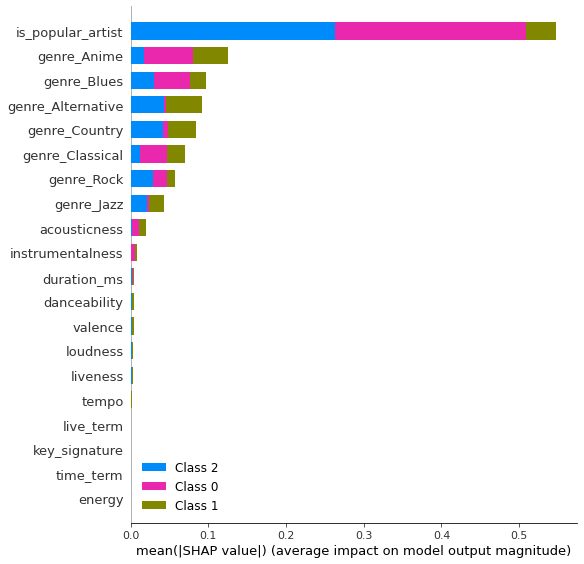

In [ ]:
# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

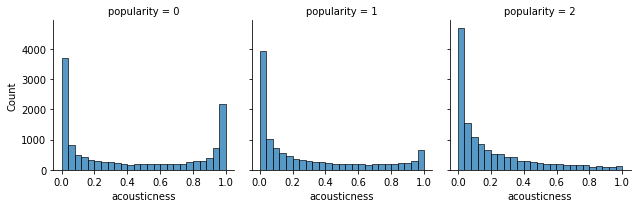

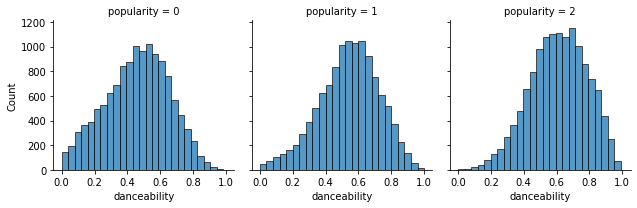

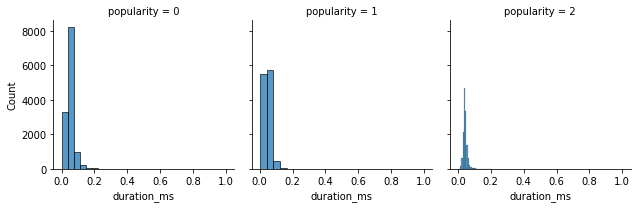

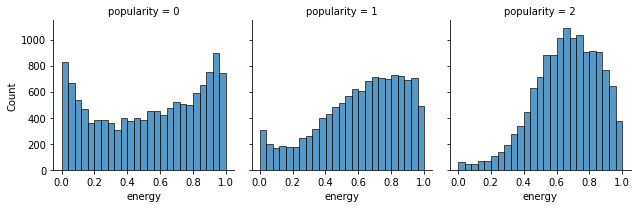

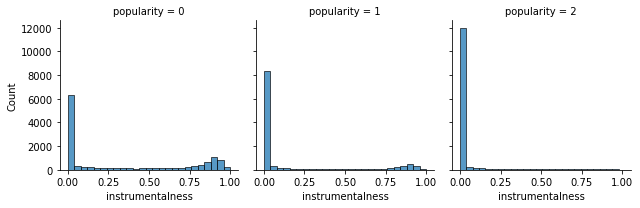

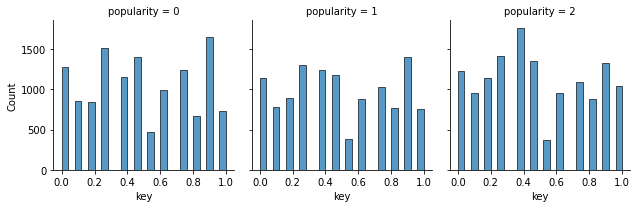

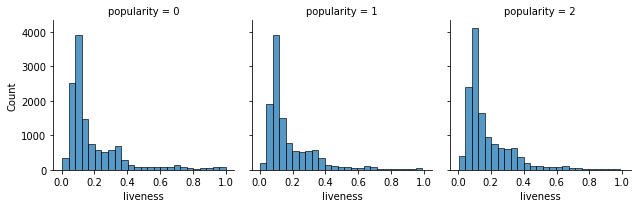

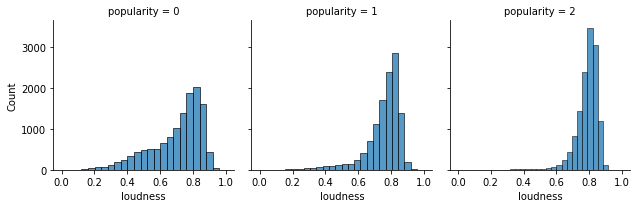

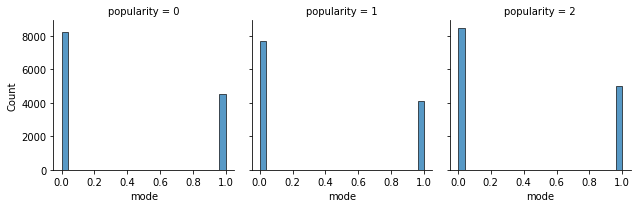

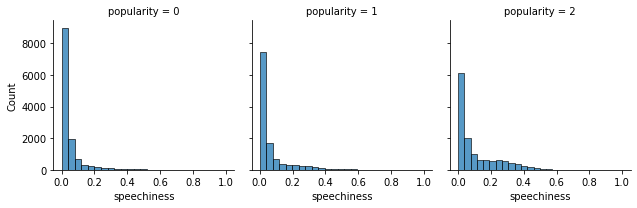

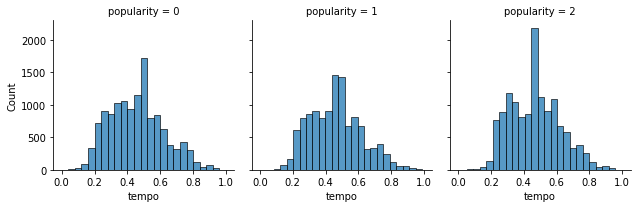

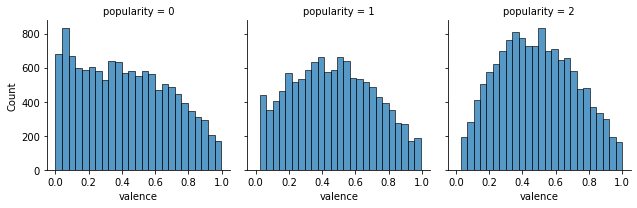

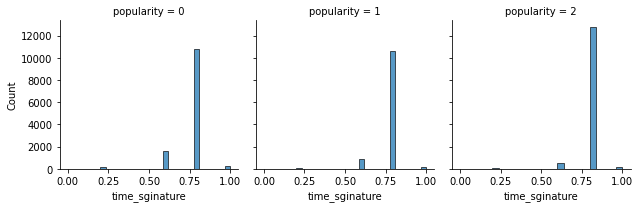

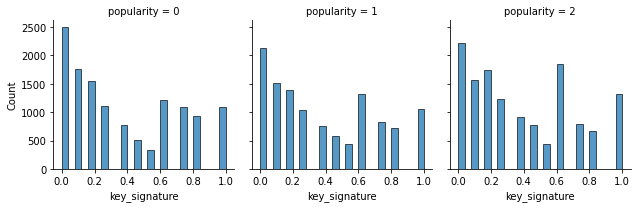

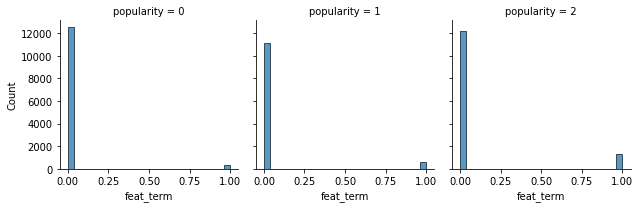

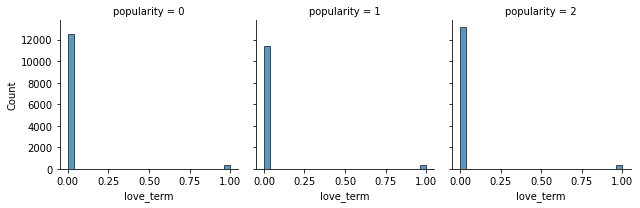

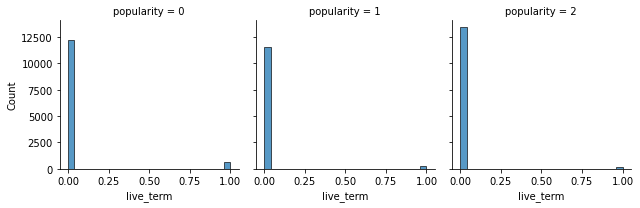

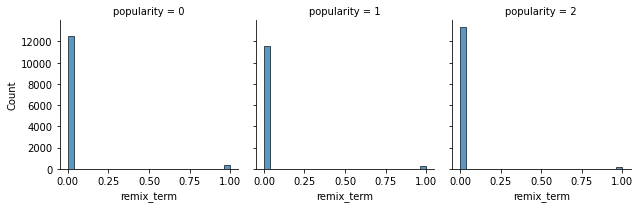

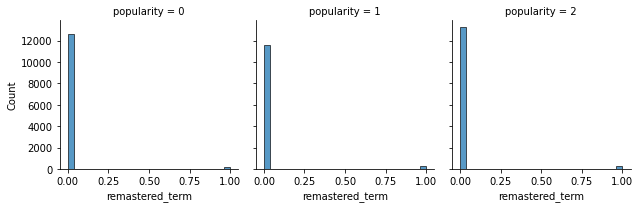

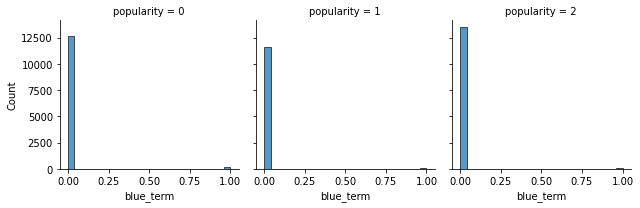

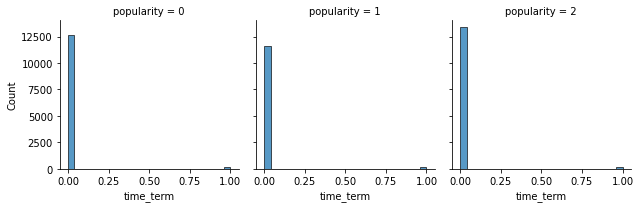

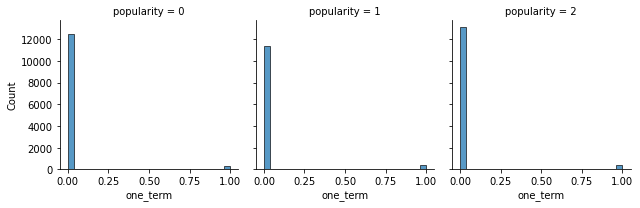

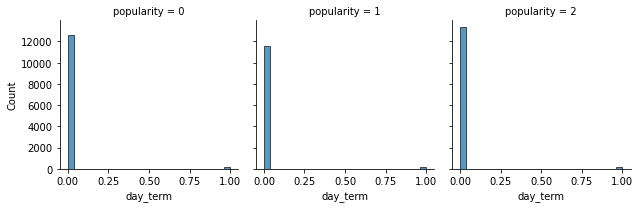

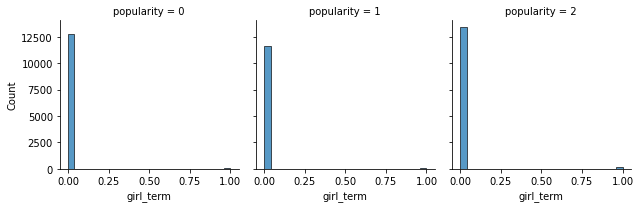

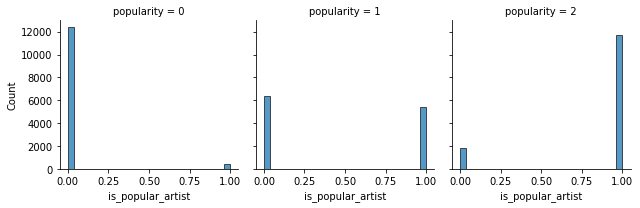

In [ ]:
#  It is possible to decide at the end which features are of interest to us and leave only them
df_train = X_train.join(y_train_cat)
for col in df_train.drop(one_hot.columns, axis=1).drop("popularity", axis=1):

  g = sns.FacetGrid(df_train, col = "popularity")
  g.map(sns.histplot, col, bins = 25)

plt.show()

### (3) SVM

Accuracy score of train set is:  0.8301025627573906


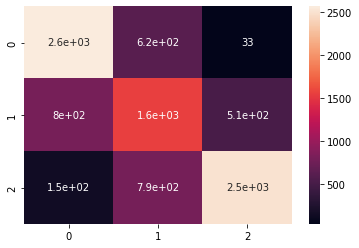

              precision    recall  f1-score   support

           0      0.731     0.798     0.763      3221
           1      0.525     0.543     0.534      2869
           2      0.822     0.728     0.772      3441

    accuracy                          0.696      9531
   macro avg      0.693     0.690     0.690      9531
weighted avg      0.702     0.696     0.697      9531



In [ ]:
clf = SVC(kernel="rbf", gamma=5, C=1)
clf = clf.fit(X_train, y_train_cat)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Accuracy score of train set is: ", metrics.accuracy_score(y_train_cat,y_train_pred))
run_metrics()

### (4) XGBoost Classifier

Accuracy score of train set is:  0.7208246990006033


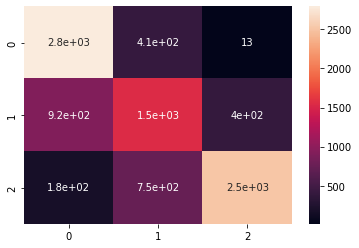

              precision    recall  f1-score   support

           0      0.719     0.868     0.786      3221
           1      0.571     0.540     0.555      2869
           2      0.858     0.731     0.789      3441

    accuracy                          0.720      9531
   macro avg      0.716     0.713     0.710      9531
weighted avg      0.725     0.720     0.718      9531



In [ ]:
clf = XGBClassifier(objective="multi:softprob", random_state=42)
clf.fit(X_train, y_train_cat)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Accuracy score of train set is: ", metrics.accuracy_score(y_train_cat,y_train_pred))
run_metrics()

### (5) RandomForest Classifier Grid search

Fitting 1 folds for each of 60 candidates, totalling 60 fits
[CV 1/1] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.678 total time=   5.5s
[CV 1/1] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.679 total time=  13.6s
[CV 1/1] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.678 total time=   5.3s
[CV 1/1] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.679 total time=  13.4s
[CV 1/1] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200;, score=0.678 total time=   5.4s
[CV 1/1] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500;, score=0.679 total time=  13.4s
[CV 1/1] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.695 total time=   6.6s
[CV 1/1] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.695 total time=  17.7s
[CV 1/1] END criterion=gini, max_depth=5, max_featu

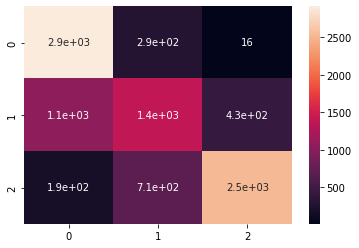

              precision    recall  f1-score   support

           0      0.701     0.904     0.790      3221
           1      0.579     0.483     0.527      2869
           2      0.850     0.737     0.790      3441

    accuracy                          0.717      9531
   macro avg      0.710     0.708     0.702      9531
weighted avg      0.718     0.717     0.711      9531



In [ ]:
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=[(slice(None), slice(None))], verbose=5)
CV_rfc.fit(X_train, y_train_cat)
y_train_pred = CV_rfc.predict(X_train)
y_test_pred = CV_rfc.predict(X_test)
# Best paramete set
print('Best parameters found:\n', CV_rfc.best_params_)
print("Accuracy score of train set is: ", metrics.accuracy_score(y_train_cat,y_train_pred))
run_metrics()

In [ ]:
print('Best parameters found:\n', CV_rfc.best_params_)

Best parameters found:
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


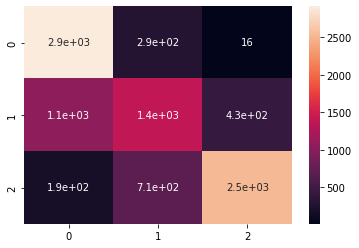

              precision    recall  f1-score   support

           0      0.701     0.904     0.790      3221
           1      0.579     0.483     0.527      2869
           2      0.850     0.737     0.790      3441

    accuracy                          0.717      9531
   macro avg      0.710     0.708     0.702      9531
weighted avg      0.718     0.717     0.711      9531



In [ ]:
run_metrics()